In [101]:
import pandas as pd 
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


scaler = MinMaxScaler()

In [36]:
dataset = pd.read_csv("D:\Datasets\Tesla.csv")

In [37]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [39]:
dataset['Date'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True)

In [40]:
dataset = dataset.set_index('Date')

<Axes: xlabel='Date'>

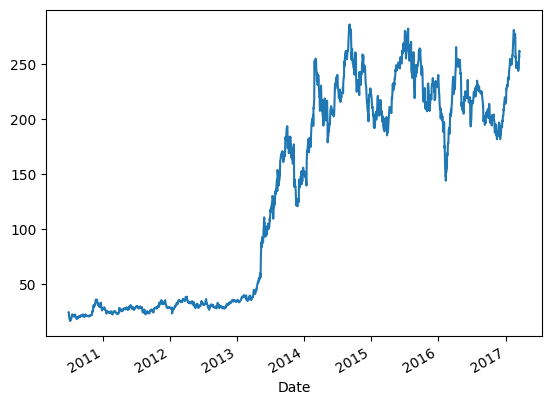

In [41]:
dataset['Close'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

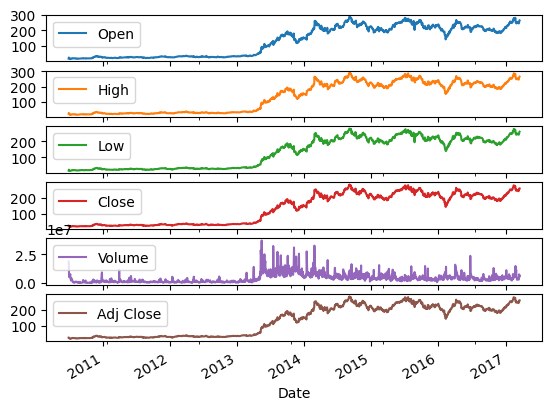

In [42]:
dataset.plot(subplots=True)

In [33]:
# y = pd.DataFrame(dataset['Close'],columns=['Close'])
# dataset = dataset.drop('Close',inplace=True,axis=1)

In [86]:
data = dataset[['Close']]
data.head()

data_encoded = scaler.fit_transform(data)

In [61]:
# data = data.values

Data Preparation Manually

In [67]:
def split_data(timesteps, data, data_len):

    X = []
    Y = []

    for i in range(timesteps,data_len):
        X.append(data[i - timesteps:i,:])
        Y.append(data[i,:])

    return np.asarray(X), np.asarray(Y)

In [87]:
data_train,data_test = train_test_split(data_encoded,test_size=0.2, random_state=42)
data_train,data_valid = train_test_split(data_train,test_size=0.2,random_state=42)

In [88]:
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1082, 1)
(339, 1)
(271, 1)


In [89]:
x_train, y_train = split_data(30,data_train,data_train.shape[0])
x_test, y_test = split_data(30,data_test,len(data_test))
x_valid, y_valid = split_data(30,data_valid, len(data_valid))

In [90]:
print(x_train.shape,y_train.shape)

(1052, 30, 1) (1052, 1)


In [94]:
model = Sequential()
model.add(LSTM(60,activation='relu',input_shape=(30,1),return_sequences=True))
Dropout(0.5)
model.add(LSTM(60,activation='relu',return_sequences=False))
Dropout(0.5)
model.add(Dense(120,activation='relu'))
model.add(Dense(1))

In [95]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 60)            14880     
                                                                 
 lstm_11 (LSTM)              (None, 60)                29040     
                                                                 
 dense_10 (Dense)            (None, 120)               7320      
                                                                 
 dense_11 (Dense)            (None, 1)                 121       
                                                                 
Total params: 51,361
Trainable params: 51,361
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(x_train,y_train, batch_size= 32, epochs= 100, validation_data=(x_valid,y_valid))

Epoch 1/100
33/33 [==============================] - 3s 28ms/step - loss: 0.1660 - mae: 0.3500 - val_loss: 0.1330 - val_mae: 0.3477
Epoch 2/100
33/33 [==============================] - 1s 17ms/step - loss: 0.1207 - mae: 0.3272 - val_loss: 0.1220 - val_mae: 0.3315
Epoch 3/100
33/33 [==============================] - 1s 16ms/step - loss: 0.1203 - mae: 0.3272 - val_loss: 0.1213 - val_mae: 0.3289
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 0.1202 - mae: 0.3269 - val_loss: 0.1210 - val_mae: 0.3261
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: 0.1215 - mae: 0.3284 - val_loss: 0.1210 - val_mae: 0.3283
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: 0.1199 - mae: 0.3273 - val_loss: 0.1208 - val_mae: 0.3281
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.1201 - mae: 0.3274 - val_loss: 0.1210 - val_mae: 0.3231
Epoch 8/100
33/33 [==============================] - 1s 43ms/step - loss: 0.

In [98]:
y_pred = model.predict(x_test)

10/10 [==============================] - 0s 7ms/step


In [115]:
for i in range(len(y_test)):
    print("{} {}".format(y_test[i], y_pred[i]))

[0.73456924] [0.47765926]
[0.03959443] [0.4839255]
[0.66585257] [0.46216843]
[0.04514505] [0.45674926]
[0.04721728] [0.44339132]
[0.49422734] [0.43425718]
[0.04418295] [0.42929596]
[0.04651421] [0.42512983]
[0.05065867] [0.42340666]
[0.69530784] [0.42343134]
[0.01887211] [0.43184954]
[0.05021463] [0.43264422]
[0.06490527] [0.43234754]
[0.76498665] [0.43194616]
[0.66921991] [0.44150263]
[0.54162964] [0.4490981]
[0.05195382] [0.44788092]
[0.06616341] [0.4410433]
[0.02371965] [0.43527475]
[0.86382474] [0.43182528]
[0.06816164] [0.44511062]
[0.87292773] [0.44215843]
[0.05813351] [0.46011627]
[0.04577413] [0.45181984]
[0.65845174] [0.4440971]
[0.04355388] [0.4438888]
[0.7689831] [0.43862766]
[0.86841322] [0.44558474]
[0.71081258] [0.4698681]
[0.40811868] [0.4801887]
[0.83769977] [0.4609892]
[0.04336886] [0.4746014]
[0.75388541] [0.4570515]
[0.75037002] [0.46233135]
[0.65649053] [0.47236672]
[0.05583925] [0.4733073]
[0.78985344] [0.4541937]
[0.85764505] [0.46207052]
[0.0580965] [0.48315996]
